In [1]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv("sepsis.csv")
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["Sepssis"]=label_encoder.fit_transform(df["Sepssis"])


In [5]:
df.drop(columns="ID", inplace=True)
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [6]:
x=df.drop(columns="Sepssis")
y=df["Sepssis"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(penalty='none')
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
test_pred = model.predict(X_test)

train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,test_pred)
print("accuracy for the train=",train_acc)
print("accuracy for the test=",test_acc)


accuracy for the train= 0.766109785202864
accuracy for the test= 0.7388888888888889


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import confusion_matrix
train_confusion = confusion_matrix(y_train, train_pred)
print(train_confusion)
print(' ')
test_confusion = confusion_matrix(y_test,test_pred)
print(test_confusion)

[[243  34]
 [ 64  78]]
 
[[98 16]
 [31 35]]


In [10]:
train_fnr = train_confusion[1, 0] / (train_confusion[0, 0] + train_confusion[1, 0])
train_fpr = train_confusion[0, 1] / (train_confusion[0, 1] + train_confusion[1, 1])

print(f'FNR: {train_fnr}')
print(f'FPR: {train_fpr}')

FNR: 0.20846905537459284
FPR: 0.30357142857142855


In [11]:
test_fnr = test_confusion[1, 0] / (test_confusion[0, 0] + test_confusion[1, 0])
test_fpr = test_confusion[0, 1] / (test_confusion[0, 1] + test_confusion[1, 1])


print(f'FNR: {test_fnr}')
print(f'FPR: {test_fpr}')

FNR: 0.24031007751937986
FPR: 0.3137254901960784


In [12]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pred)
train_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,test_pred)
test_auc = auc(test_fpr, test_tpr)

print(f'train auc: {train_auc}')
print(f'test auc: {test_auc}')

train auc: 0.7132760461687091
test auc: 0.6949760765550239


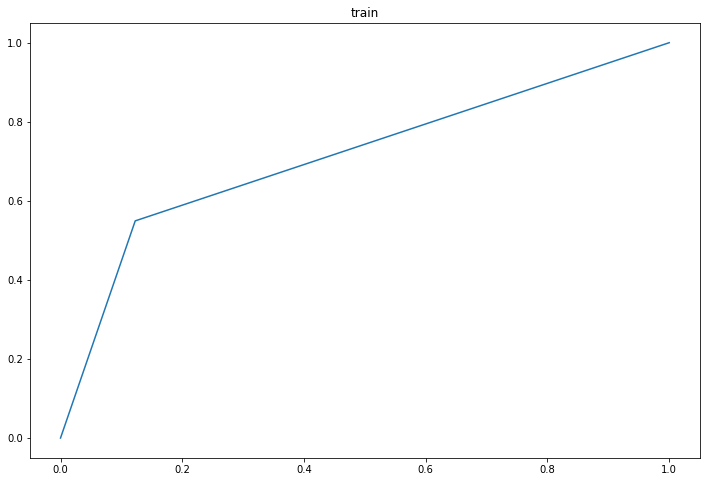

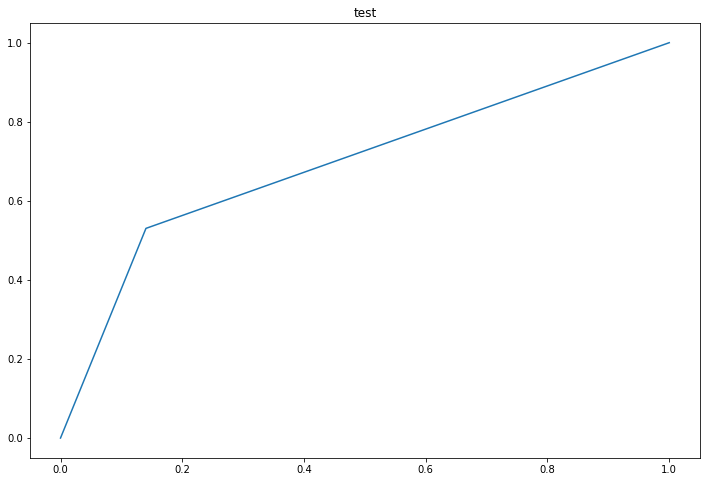

In [13]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(train_fpr, train_tpr)
plt.title('train')
plt.show()
plt.figure(figsize=(12, 8))
plt.plot(test_fpr, test_tpr)
plt.title('test')
plt.show()

In [14]:
from sklearn.metrics import precision_recall_fscore_support

train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test,test_pred, average='binary')

print(f'train precision: {train_precision}')
print(f'train recall: {train_recall}')
print(f'train fscore: {train_fscore}')
print(' ')

print(f'test precision: {test_precision}')
print(f'test recall: {test_recall}')
print(f'test fscore: {test_fscore}')

train precision: 0.6964285714285714
train recall: 0.5492957746478874
train fscore: 0.6141732283464568
 
test precision: 0.6862745098039216
test recall: 0.5303030303030303
test fscore: 0.5982905982905983


In [15]:
X=df.drop(columns="Sepssis")
Y=df["Sepssis"]

In [16]:
from sklearn.model_selection import train_test_split
x_train, X_val, Y_train, y_val = train_test_split(X, Y, test_size=0.30, random_state=42)
x_val,X_test,Y_val,Y_test=train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [17]:

C_choices = [100, 10, 1, 0.1, 0.01, 0.001]

best_C = None
max_acc = -1

for C in C_choices:
    classifier = LogisticRegression(penalty='l2', C=C).fit(x_train,Y_train)
    predicted_validation_score = classifier.predict_proba(x_val)[:, 1]
    predicted_validation_label = predicted_validation_score >= 0.5
    true_validation_label = Y_val >= 0.5
    validation_acc = accuracy_score(Y_val,predicted_validation_label)
    print(f'C = {C}, validation accuracy = {validation_acc}')
    
    if validation_acc > max_acc:
        max_acc = validation_acc
        best_C = C
        
print('')
print(f'best C: {best_C}, max validation accuracy: {max_acc}')

C = 100, validation accuracy = 0.7222222222222222
C = 10, validation accuracy = 0.7
C = 1, validation accuracy = 0.7
C = 0.1, validation accuracy = 0.7111111111111111
C = 0.01, validation accuracy = 0.7333333333333333
C = 0.001, validation accuracy = 0.7333333333333333

best C: 0.01, max validation accuracy: 0.7333333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [18]:
test_pred = classifier.predict(X_test)
test_acc=accuracy_score(Y_test,test_pred)
print("Test accuracy=",test_acc)
print('')
test_confusion = confusion_matrix(Y_test,test_pred)
print(test_confusion)

Test accuracy= 0.7555555555555555

[[51  9]
 [13 17]]
